# PROJET 3 : Concevez une application au service de la santé publique

## NOTEBOOK DE NETTOYAGE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Chargement des données

In [2]:
df_initial = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t')

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,47,52,64,79,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df_initial.copy()

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Structure des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714376 entries, 0 to 1714375
Columns: 184 entries, code to carnitine_100g
dtypes: float64(120), int64(2), object(62)
memory usage: 2.4+ GB


In [6]:
# Structure du dataframe
print(f'Nombre de lignes :{df.shape[0]}')
print(f'Nombre de colonnes:{df.shape[1]}')

Nombre de lignes :1714376
Nombre de colonnes:184


In [7]:
# Nombre de données manquantes par colonnes
df.isna().sum()

code                        0
url                         0
creator                     4
created_t                   0
created_datetime            0
                       ...   
choline_100g          1714336
phylloquinone_100g    1712663
beta-glucan_100g      1714346
inositol_100g         1714330
carnitine_100g        1714356
Length: 184, dtype: int64

In [8]:
# Pourcentage de données non nulles par colonnes
round(((len(df)-df.isna().sum())/len(df))*100,2)

code                  100.0
url                   100.0
creator               100.0
created_t             100.0
created_datetime      100.0
                      ...  
choline_100g            0.0
phylloquinone_100g      0.1
beta-glucan_100g        0.0
inositol_100g           0.0
carnitine_100g          0.0
Length: 184, dtype: float64

In [9]:
# Nombre total de données manquantes
df.isna().sum().sum()

250814624

In [10]:
# Pourcentage de données manquantes dans chaque colonne 
df.isnull().sum()/len(df)*100

code                   0.000000
url                    0.000000
creator                0.000233
created_t              0.000000
created_datetime       0.000000
                        ...    
choline_100g          99.997667
phylloquinone_100g    99.900080
beta-glucan_100g      99.998250
inositol_100g         99.997317
carnitine_100g        99.998833
Length: 184, dtype: float64

In [11]:
# Pourcentage moyen de données manquantes dans df
Mean_Pourcentage_NA = round((df.isnull().sum()/len(df)*100).mean(),2)
print(f'Pourcentage de données manquantes dans df : {Mean_Pourcentage_NA} %')

Pourcentage de données manquantes dans df : 79.51 %


In [12]:
# Synthèse structure des données 

type_of_variable = df.dtypes.value_counts()

Nombre_variables_numeriques =type_of_variable[type_of_variable.index=='float64'][0]+type_of_variable[type_of_variable.index=='int64'][0]

dict_structure = {'Nombre de lignes':df.shape[0], 'Nombre de colonnes':int(df.shape[1]), 
                  'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                  'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                  'Pourcentage de données manquantes':int((df.isnull().sum()/len(df)*100).mean()),
                  'Nombre de doublons':int(len(df[df.duplicated()]))}


structure_df=pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])
structure_df


,Caractéristiques,Valeurs
0,Nombre de lignes,1714376
1,Nombre de colonnes,184
2,Nombre de variables catégorielles,62
3,Nombre de variables numériques,122
4,Pourcentage de données manquantes,79
5,Nombre de doublons,2


## 3. Idée d'application

## 4. Traitement des données manquantes

### 4.1. Visualisation des données manquantes par variable

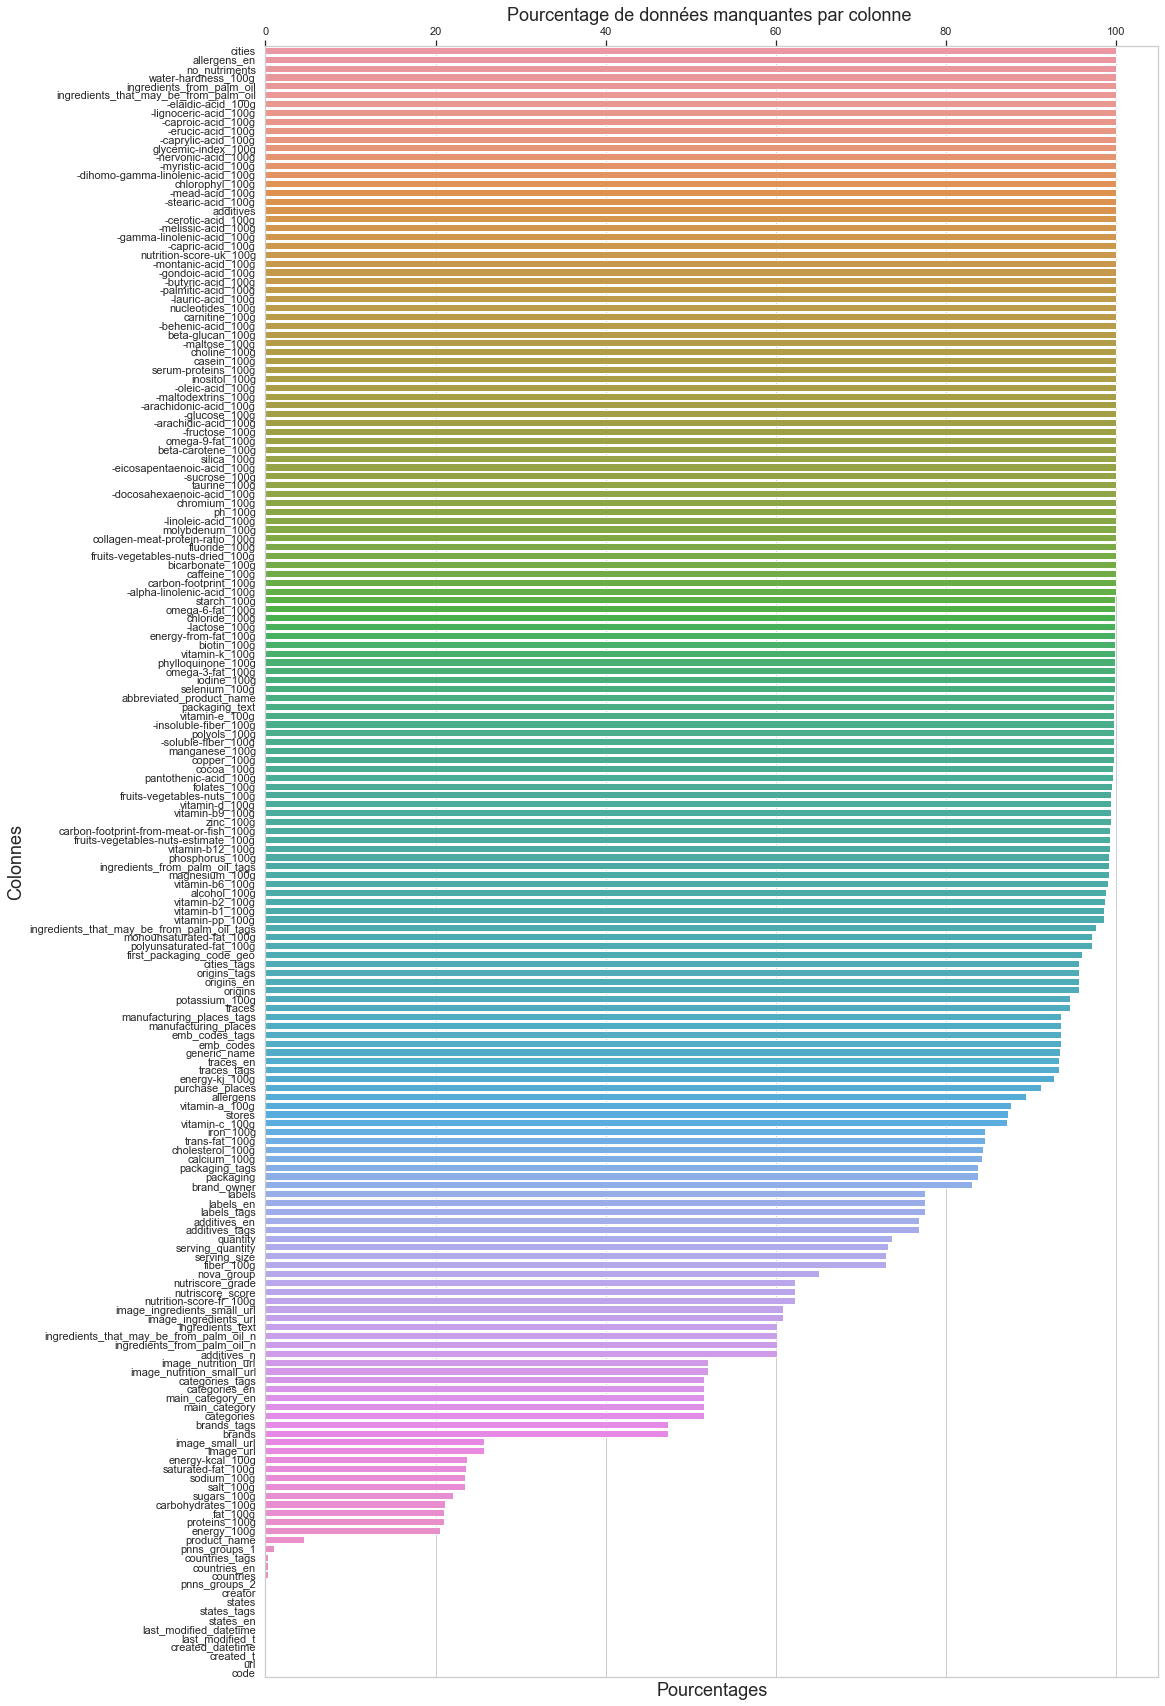

In [14]:
pourcentage_nan = df.isna().sum().divide(df.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = pourcentage_nan.index, x=pourcentage_nan.values)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Colonnes', fontsize=18)
plt.xlabel('Pourcentages', fontsize=18)
plt.title('Pourcentage de données manquantes par colonne ', size=18)
plt.show()

### 4.2. Filtrage des colonnes en fonction du pourcentage de données manquantes

In [16]:
# Suppression des colonnes contenant plus de 75 % de données manquantes
column_with_nan = df.columns[df.isnull().any()]

for column in column_with_nan:
     if df[column].isnull().sum()*100.0/df.shape[0] > 75:
            df.drop(column,1, inplace=True)

In [17]:
print(f'Il ne reste plus que :{df.shape[1]} colonnes sur les {df_initial.shape[1]} que contenait initialement notre Dataframe')

Il ne reste plus que :50 colonnes sur les 184 que contenait initialement notre Dataframe


In [18]:
# Voyons s'il existe des lignes avec uniquement des données manquantes
# pour cela nous allons afficher les 10 lignes avec le plus fort pourcentage de données manquantes
(df.isnull().sum(axis=1).nlargest(10)/df.shape[1])*100

448308     80.0
1709469    80.0
13371      76.0
18295      76.0
136455     76.0
142446     76.0
144714     76.0
156169     76.0
171869     76.0
251494     76.0
dtype: float64

### 5. Suppression des doublons

In [19]:
# Comptage du nombre de doublons
print(f'Nombre de lignes en doublons :{len(df[df.duplicated()])}')

Nombre de lignes en doublons :2


In [20]:
# Visualisation des doublons
df[df.duplicated()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1007123,3770008983205,http://world-en.openfoodfacts.org/product/3770...,r-x,1614201389,2021-02-24T21:16:29Z,1614242412,2021-02-25T08:40:12Z,REMYX VODKA Aquatique,70 cl,REMYX VODKA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310411,7340011495437,http://world-en.openfoodfacts.org/product/7340...,halal-app-chakib,1610378294,2021-01-11T15:18:14Z,1610393709,2021-01-11T19:35:09Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Suppression des doublons
df.drop_duplicates(inplace=True)

### 6. Suppression des variables non pertinentes

In [22]:
# Affichage des noms des colonnes
df.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'quantity', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'serving_size',
       'serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url',
       'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_1

In [23]:
df.nutriscore_grade.unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

In [24]:
columns_to_drop = ['code','url','creator', 'created_t', 'created_datetime','last_modified_t', 'last_modified_datetime',
                   'quantity', 'brands','brands_tags','categories_tags','categories_en','countries_tags', 'countries_en',
                   'ingredients_text', 'serving_size','serving_quantity','additives_n','ingredients_from_palm_oil_n',
                   'ingredients_that_may_be_from_palm_oil_n','nutriscore_score','nova_group','pnns_groups_1','pnns_groups_2',
                   'states','states_tags','states_en', 'main_category','main_category_en','image_url','image_small_url',
                   'image_ingredients_url','image_ingredients_small_url','image_nutrition_url','image_nutrition_small_url']

df = df.drop(columns_to_drop,axis=1)

In [25]:
print(f'Nombre de colonnes supprimées suite au filtrage : {len(columns_to_drop)}')
print(f'Nombre de colonnes restantes :{len(df.columns)}')

Nombre de colonnes supprimées suite au filtrage : 35
Nombre de colonnes restantes :15


In [26]:
df.columns

Index(['product_name', 'categories', 'countries', 'nutriscore_grade',
       'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

### 7. Traitement des valeurs aberrantes

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


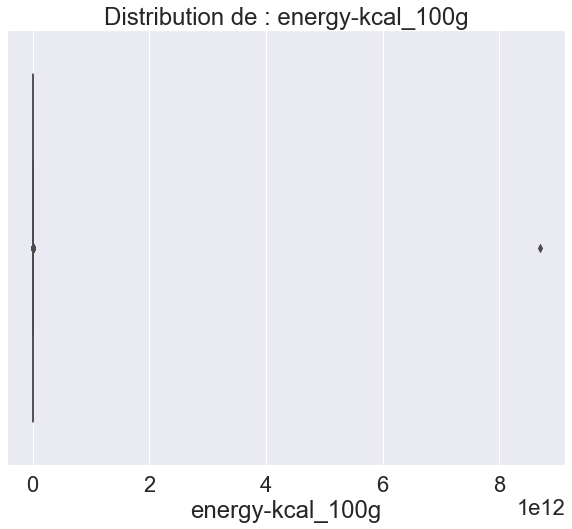

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


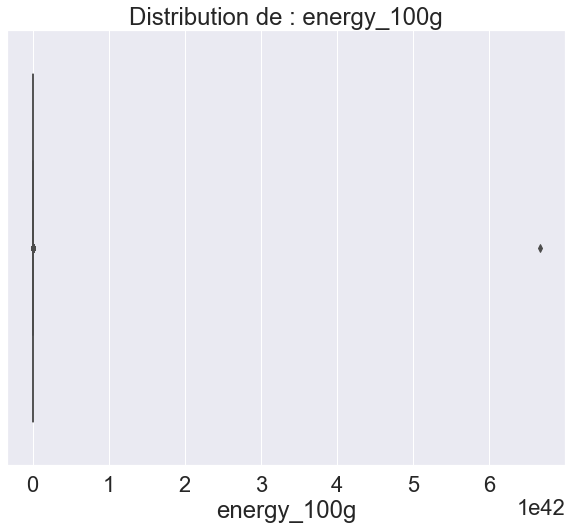

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


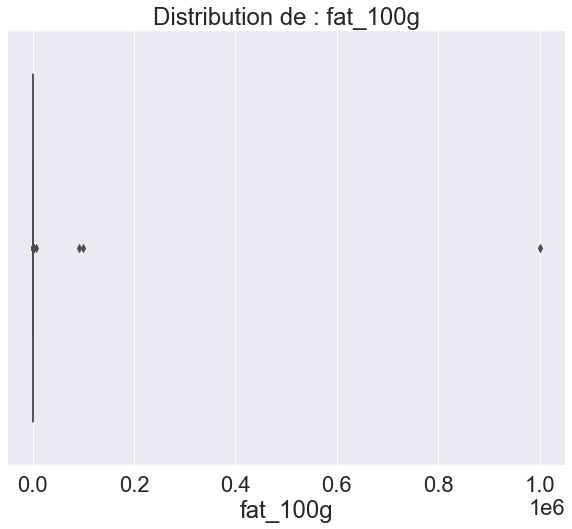

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


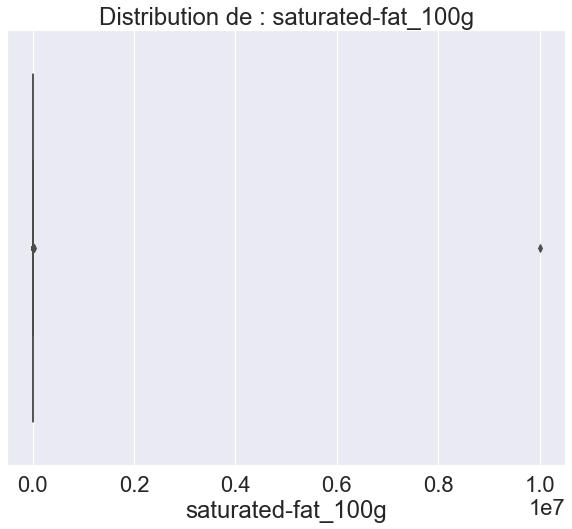

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


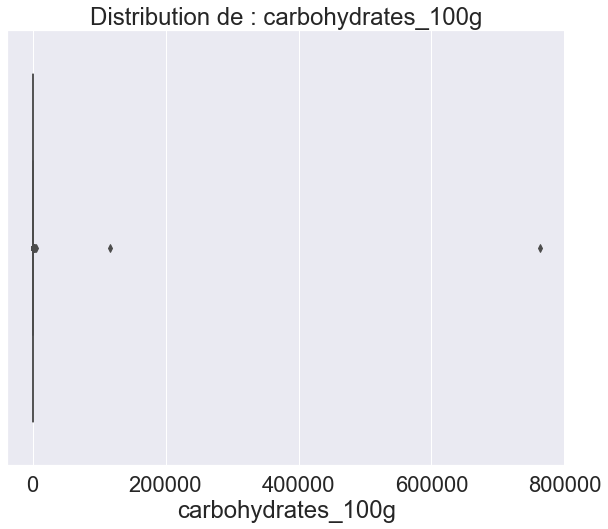

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


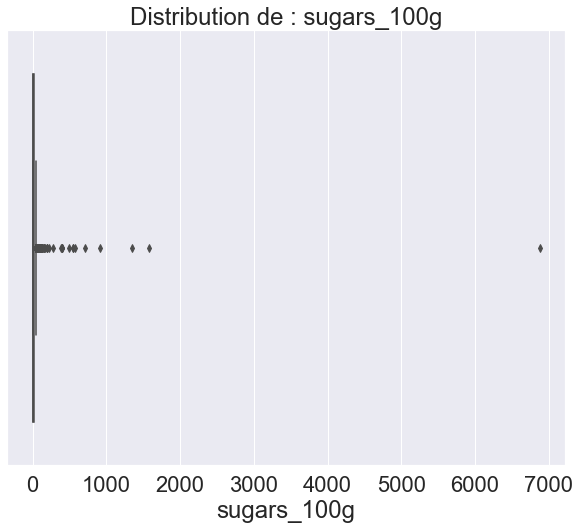

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


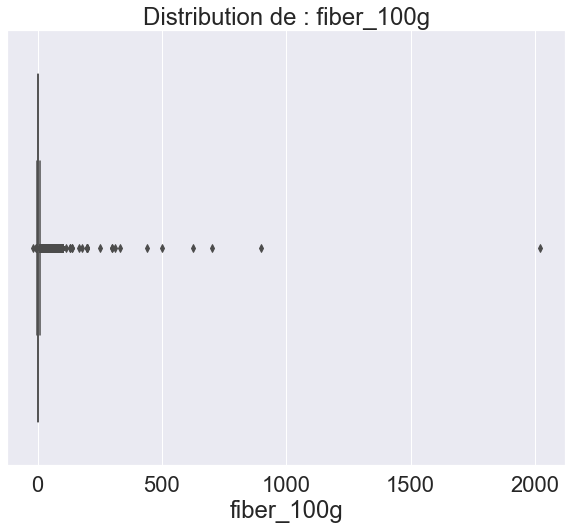

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


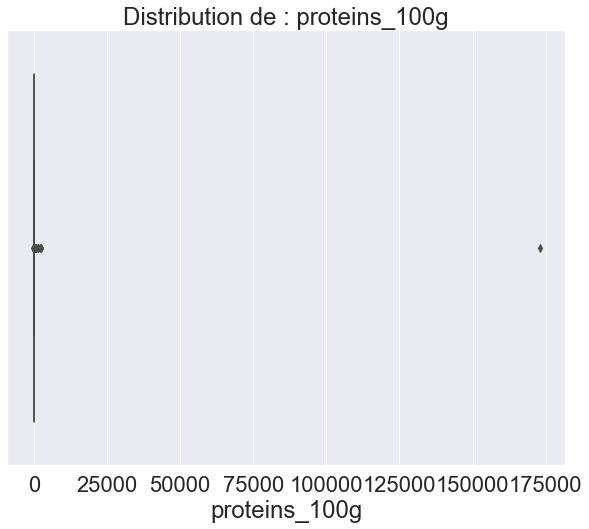

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


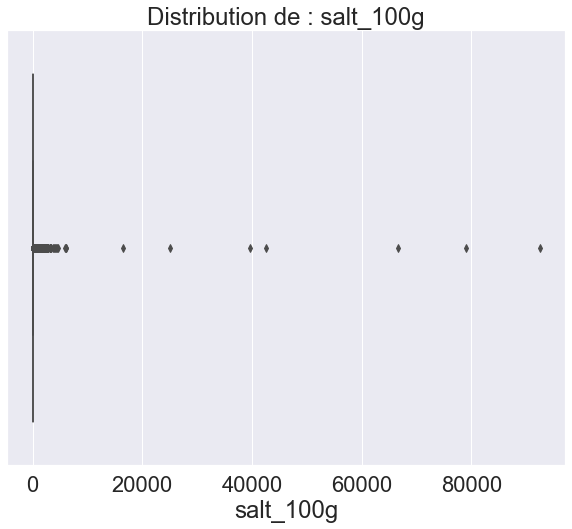

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


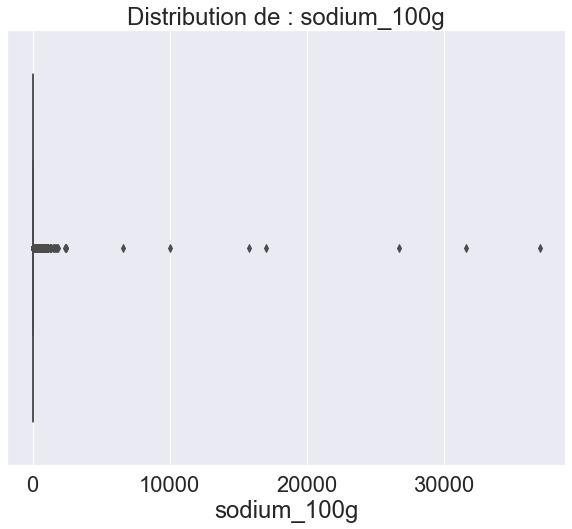

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


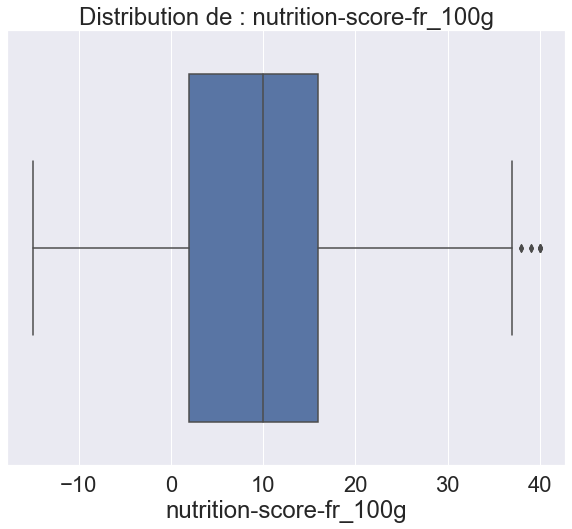

In [27]:
numeric_columns = df.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (10,8))
    
    sns.boxplot(df[column])
    title = 'Distribution de : ' + column
    plt.title(title)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

In [28]:
# Méthodes des interquantiles
q_low = df["nutrition-score-fr_100g"].quantile(0.05)
q_hi  = df["nutrition-score-fr_100g"].quantile(0.95)

df_filtered_nutriscore_score = df[(df["nutrition-score-fr_100g"] < q_hi) & (df["nutrition-score-fr_100g"] > q_low)]


In [29]:
# Valeurs de la variables nutriscore_score
df['nutrition-score-fr_100g'].unique()

array([ nan,  18.,   1.,  14.,  -2.,   4.,   0.,  -4.,  15.,  17.,  21.,
         2.,   3.,  29.,   6.,  22.,   9.,   7.,   5.,  28.,  23.,  11.,
        20.,  12.,  16.,  26.,  19.,  24.,  13.,  36.,  -3.,  27.,  10.,
        25.,  -7.,  -6.,  -5.,  -1.,  -8.,  -9., -11.,   8.,  30., -10.,
       -13., -12., -14.,  33.,  31.,  34.,  32.,  35.,  37., -15.,  40.,
        39.,  38.])

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


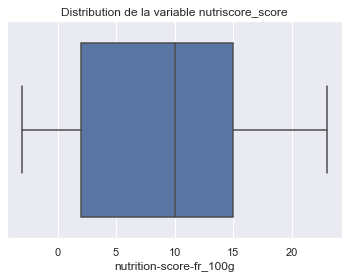

In [30]:
sns.boxplot(df_filtered_nutriscore_score["nutrition-score-fr_100g"]).set(title="Distribution de la variable nutriscore_score")
plt.show()

In [34]:
def delete_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g'''
    #valeurs extremes
    
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        index_nan = []
        index_nan_flat = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.95)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.05)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
#suppression des doublons
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        dataframe[column].loc[index_nan_flat] = np.nan
   
            
    return dataframe

In [35]:
df_filtered =delete_outliers(df)

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


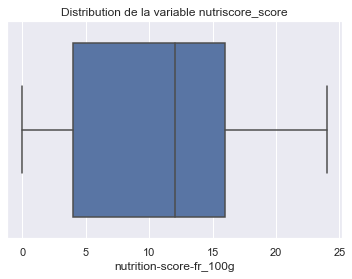

In [36]:
sns.boxplot(df_filtered["nutrition-score-fr_100g"]).set(title="Distribution de la variable nutriscore_score")
plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


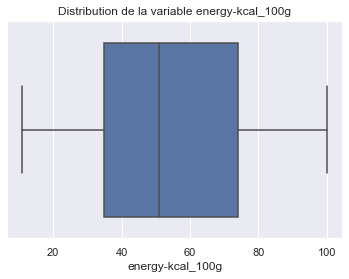

In [37]:
sns.boxplot(df_filtered["energy-kcal_100g"]).set(title="Distribution de la variable energy-kcal_100g")
plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


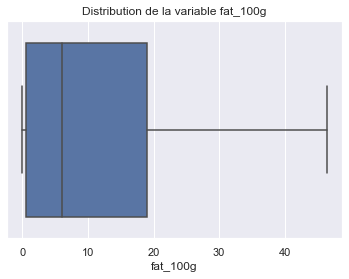

In [38]:
sns.boxplot(df_filtered["fat_100g"]).set(title="Distribution de la variable fat_100g")
plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


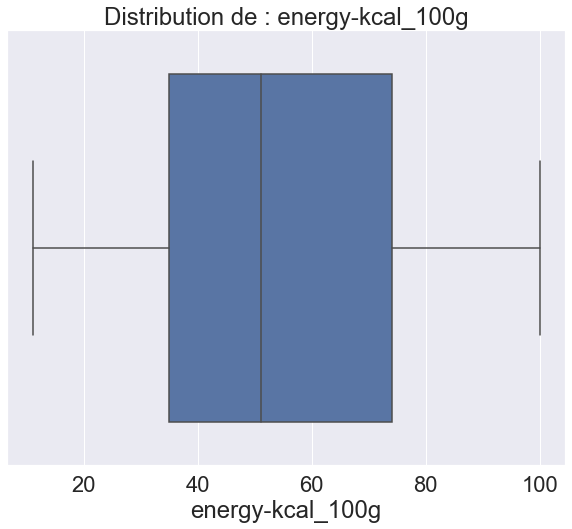

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


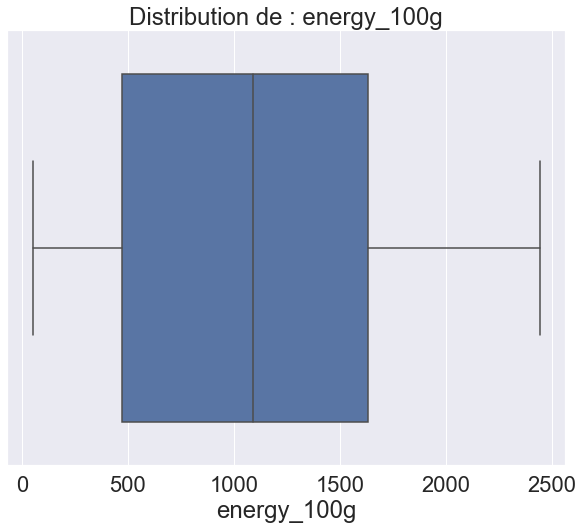

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


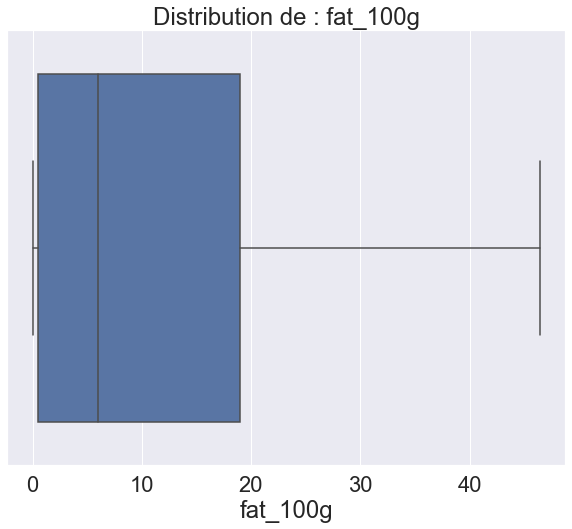

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


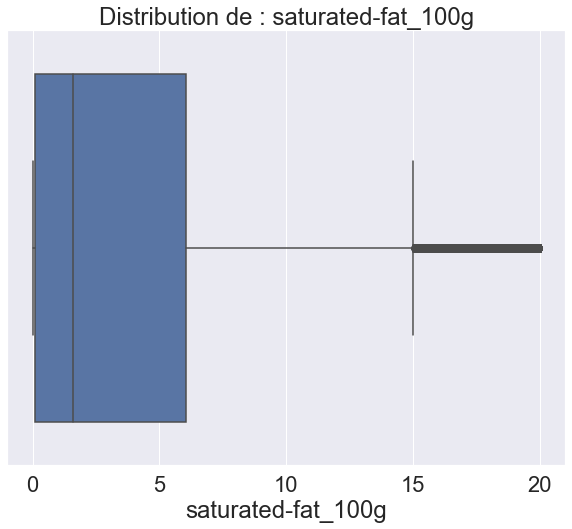

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


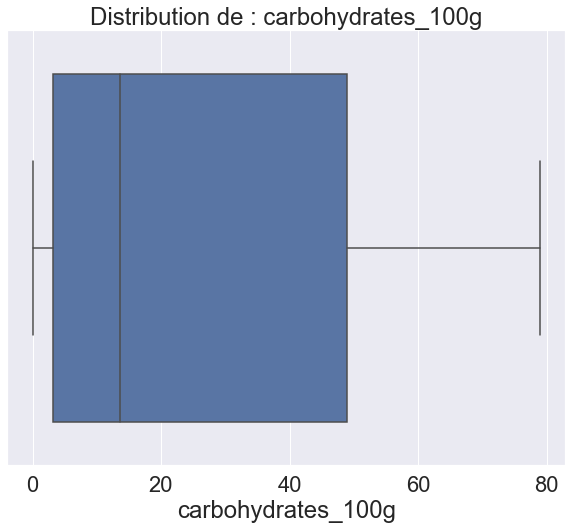

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


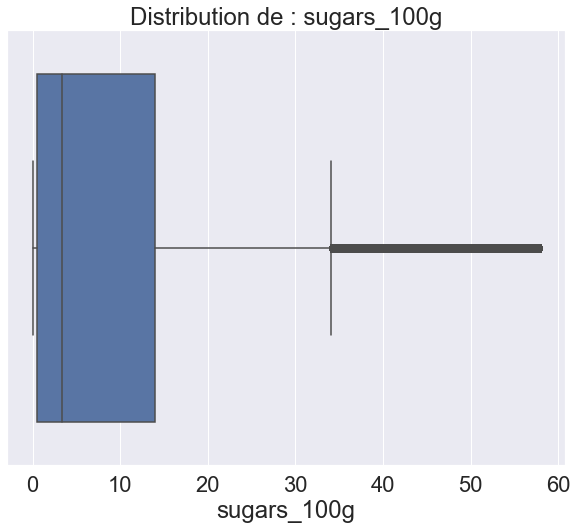

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


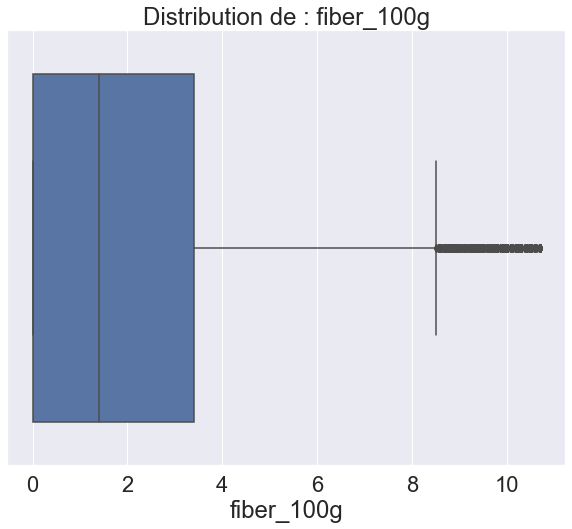

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


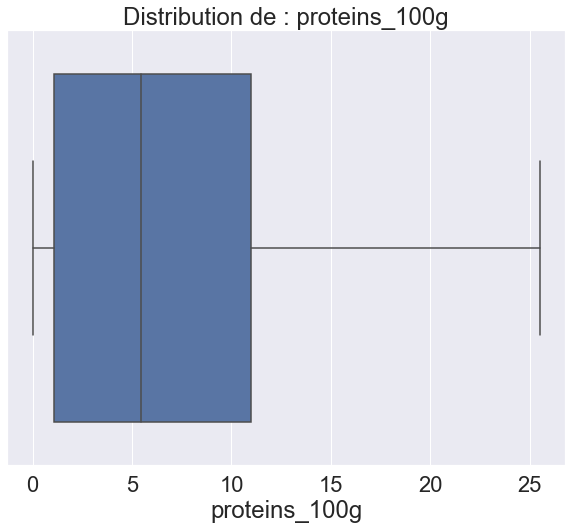

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


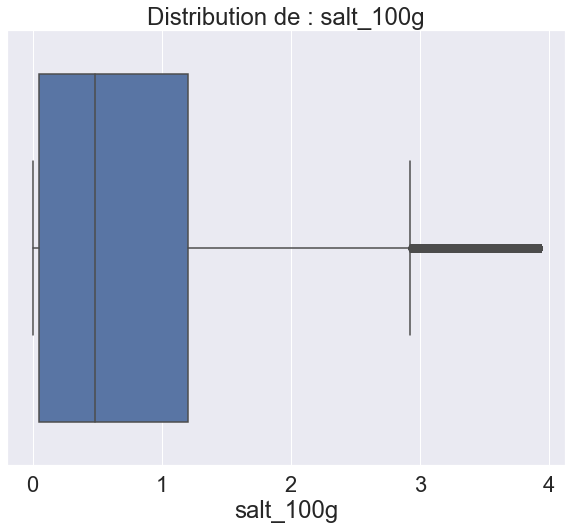

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


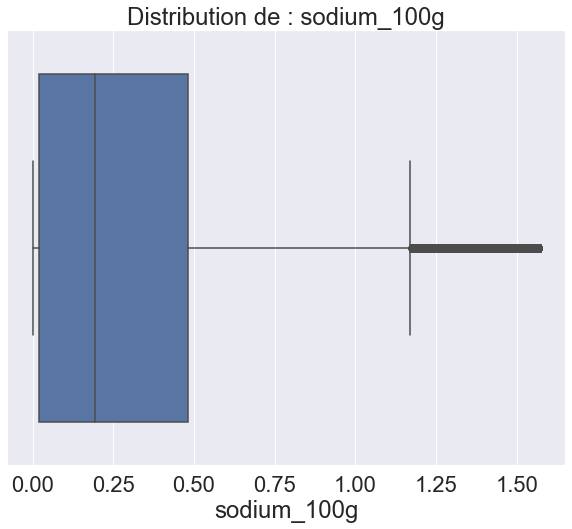

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


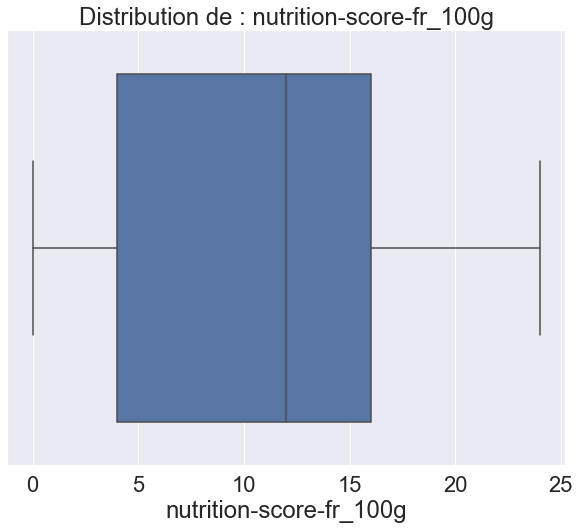

In [39]:
numeric_columns = df_filtered.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (10,8))
    
    sns.boxplot(df[column])
    title = 'Distribution de : ' + column
    plt.title(title)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

### 7. Remplacement des valeurs manquantes dans les colonnes numériques par la mediane

In [40]:
for col in df_filtered.select_dtypes(include = ['int32','float64']):
    df_filtered[col] = df_filtered[col].fillna(df_filtered[col].median())

In [41]:
df_filtered.head()

,product_name,categories,countries,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Vitória crackers,NaN,France,NaN,51.0,1569.0,7.00,3.08,70.10,15.00,1.4,7.80,1.4000,0.560,12.0
1,Cacao,NaN,France,NaN,51.0,1088.0,5.97,1.60,13.57,3.33,1.4,5.45,0.4825,0.193,12.0
2,Filetes de pollo empanado,NaN,en:es,NaN,51.0,1088.0,5.97,1.60,13.57,3.33,1.4,5.45,0.4825,0.193,12.0
3,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes",France,d,51.0,936.0,8.20,2.20,29.00,22.00,0.0,5.10,0.4825,0.193,18.0
4,Sfiudwx,Xsf,en:France,NaN,51.0,1088.0,5.97,1.60,13.57,3.33,1.4,5.45,0.4825,0.193,12.0


### 9. Filtre par pays

In [42]:
# Affichage de la liste des pays
df_filtered.countries.unique().tolist()

['France',
 'en:es',
 'en:France',
 'en:france',
 'en:fr',
 'United States',
 'Irlande',
 'en:FR',
 nan,
 'en:be',
 'United Kingdom',
 'États-Unis, en:france',
 'France, United States',
 'France,États-Unis',
 'Spain',
 'en:Ivory Coast',
 'Canada',
 'España',
 'Allemagne',
 'Suisse',
 'en:it',
 'Germany',
 'France,Belgique',
 'Belgium',
 'France, États-Unis',
 'Pérou',
 'en:germany',
 'Schweiz',
 'Oman',
 'Deutschland',
 'Slovenia',
 'en:DE',
 'en:de',
 'Frankreich, Deutschland',
 'France,Germany,Netherlands',
 'en:KW',
 'ફ્રાન્સ',
 'en:spain',
 'France,Switzerland',
 'Frankreich, en:de',
 'France, en:de',
 'Italy',
 'Romania',
 'en:US',
 'Australia',
 'en:lu',
 'en:Spain',
 'en:United Arab Emirates',
 'en:Italy',
 'Portugal',
 'en:us',
 'en:Dominican Republic',
 'en:RE',
 'Espagne',
 'en:Canada',
 'United Kingdom,en:united-kingdom',
 'Israel',
 'en:CH',
 'en:Netherlands',
 'us',
 'Royaume-Uni',
 'Belgique,France',
 'en:United States',
 'en:ca',
 'en:Saudi Arabia',
 'en:pl',
 'en:gb',
 

In [43]:
# L'application étant destinée au marché français, on effectue un filtre pour ne conserver que les données concernant la France
indicators_to_keep = ['France', 'FR', 'en:FR', 'en:fr', 'en:France']
df_filtered = df_filtered[df_filtered['countries'].isin(indicators_to_keep)]

### 10. Synthèse

In [44]:
df_cleaned = df_filtered.copy()

#### Synthèse du dataframe après nettoyage : 

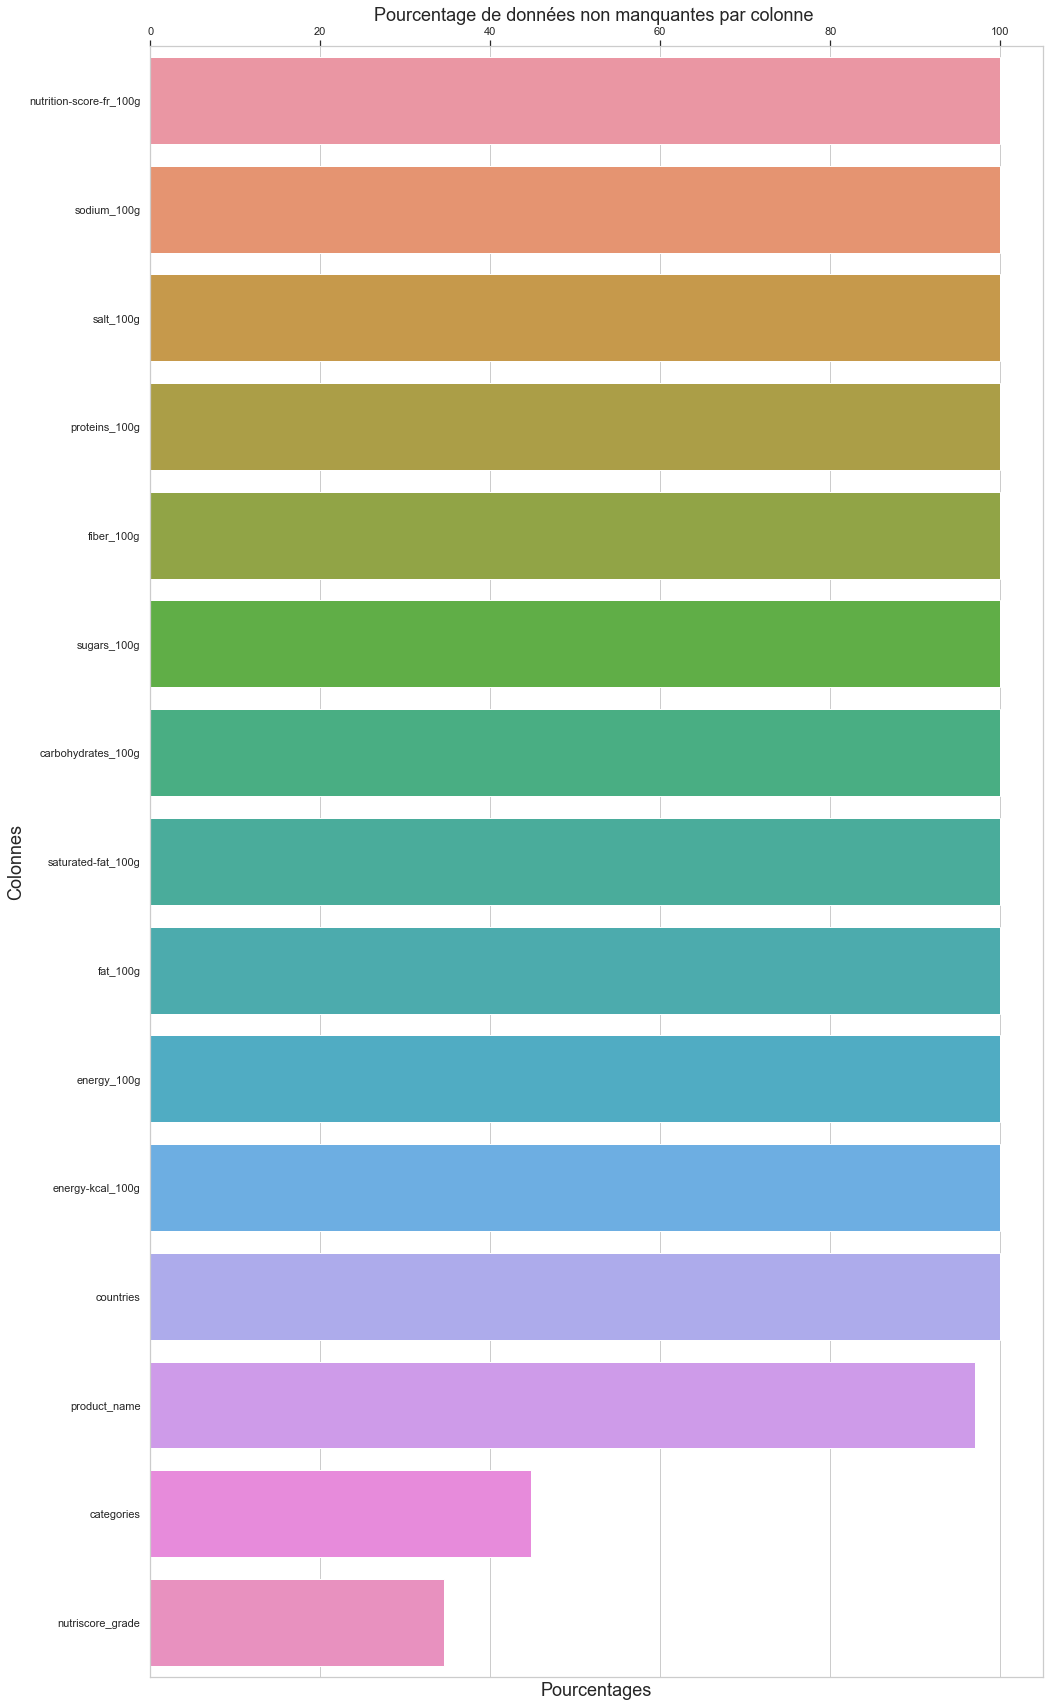

In [73]:
# Visualisation des variables contenant encore des données manquantes :
pourcentage_not_nan = df_cleaned.notna().sum().divide(df_cleaned.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = pourcentage_not_nan.index, x=pourcentage_nan.values)
ax.xaxis.set_ticks_position('top')
plt.ylabel('Colonnes', fontsize=18)
plt.xlabel('Pourcentages', fontsize=18)
plt.title('Pourcentage de données non manquantes par colonne ', size=18)
plt.show()

In [57]:
# Tableau de synthèse du dataframe après nettoyage
type_of_variable = df_cleaned.dtypes.value_counts()

Nombre_variables_numeriques =type_of_variable[type_of_variable.index=='float64'][0]


dict_final = {'Nombre de lignes':df_cleaned.shape[0], 'Nombre de colonnes':int(df_cleaned.shape[1]), 
                  'Nombre de variables catégorielles':int(type_of_variable[type_of_variable.index=='object'][0]),
                  'Nombre de variables numériques ':int(Nombre_variables_numeriques),
                  'Pourcentage de données manquantes':int((df_cleaned.isnull().sum()/len(df_cleaned)*100).mean()),
                  }


structure_final=pd.DataFrame(list(dict_final.items()),columns=['Caractéristiques','Valeurs'])
structure_final


,Caractéristiques,Valeurs
0,Nombre de lignes,639465
1,Nombre de colonnes,15
2,Nombre de variables catégorielles,4
3,Nombre de variables numériques,11
4,Pourcentage de données manquantes,8


### 10.Enregistrement du fichier nettoyé

In [62]:
df_cleaned.to_csv('en.openfoodfacts.org.products_cleaned.csv', index=False)

# Partie 2

## 1. Fonctions d'automatisation

###  Chargement des données

In [63]:
dataframe = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t')

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,22,23,27,28,29,31,47,52,64,79,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 1.1. Vérifications des colonnes

In [64]:
def check_columns(dataframe):
    '''Vérifie si le dataframe comporte une ou des colonnes en trop ou en moins'''
    
    list_columns =['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutriscore_score',
 'nutriscore_grade',
 'nova_group',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'brand_owner',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'image_nutrition_url',
 'image_nutrition_small_url',
 'energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 '-alpha-linolenic-acid_100g',
 '-eicosapentaenoic-acid_100g',
 '-docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 '-linoleic-acid_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructose_100g',
 '-lactose_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'fiber_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'proteins_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'salt_100g',
 'sodium_100g',
 'alcohol_100g',
 'vitamin-a_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-c_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'calcium_100g',
 'phosphorus_100g',
 'iron_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g',
 'fruits-vegetables-nuts_100g',
 'fruits-vegetables-nuts-dried_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'collagen-meat-protein-ratio_100g',
 'cocoa_100g',
 'chlorophyl_100g',
 'carbon-footprint_100g',
 'carbon-footprint-from-meat-or-fish_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'glycemic-index_100g',
 'water-hardness_100g',
 'choline_100g',
 'phylloquinone_100g',
 'beta-glucan_100g',
 'inositol_100g',
 'carnitine_100g']
# Check colonnes manquantes
    for column in list_columns:
        if column not in dataframe.columns:
            msg = "Il manque la colonne '{}' "
            raise Exception(msg.format(column))
# Check colonnes en trop
    for column in dataframe.columns:   
        if column not in list_columns:
            msg2 = "Colonne en trop: '{}' "
            raise Exception(msg2.format(column))
    print('Columns check : OK')


### 1.2. Suppression des variables inutiles

In [65]:
def delete_useless_variables(dataframe):
    ''' Suppression des colonnes inutiles pour notre projet'''
    
    columns_to_keep =['product_name', 'categories', 'countries', 'nutriscore_grade','energy-kcal_100g', 'energy_100g', 'fat_100g', 
                  'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g','salt_100g',
                  'sodium_100g', 'nutrition-score-fr_100g']
    for column in dataframe.columns:
        if column not in columns_to_keep:
            dataframe= dataframe.drop(column, axis=1)
    return dataframe


### 1.3. Suppression des outliers et des doublons


In [66]:
def delete_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g'''
    #valeurs extremes
    
    for column in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        index_nan = []
        index_nan_flat = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.95)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.05)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
#suppression des doublons
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        dataframe[column].loc[index_nan_flat] = np.nan
   
            
    return dataframe

### 1.4. Filtre pays

In [67]:
def filtre_pays(dataframe):
    '''Filtre du dataframe aux territoires français'''
    
    indicators_to_keep = ['France', 'FR', 'en:FR', 'en:fr', 'en:France']          
    dataframe = dataframe[dataframe['countries'].isin(indicators_to_keep)]
    return dataframe

### 1.5. Remplacement des valeurs manquantes par la médiane

In [68]:
def replace_nan(dataframe):
    '''Remplacement des valeurs manquantes dans les colonnes numériques par la médiane'''
    for col in dataframe.select_dtypes(include = ['int32','float64']):
        dataframe[col] = dataframe[col].fillna(dataframe[col].median())
    return dataframe

## 2. Fonction globale de nettoyage du dataframe

In [69]:
def clean_data(dataframe):
    check_columns(dataframe)
    dataframe =delete_useless_variables(dataframe)
    print('Colonnes inutiles : supprimées')
    dataframe = delete_outliers(dataframe)
    print('Outliers & doublons : traités')
    dataframe = filtre_pays(dataframe)
    print('Filtre territoires français : appliqué')
    dataframe = replace_nan(dataframe)
    print('Remplacement des valeurs manquantes par le médiane : effectué')
    print('traitement terminé')
    return dataframe   

In [71]:
data_cleaned = clean_data(dataframe)

Columns check : OK
Colonnes inutiles : supprimées


C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Outliers & doublons : traités
Filtre territoires français : appliqué
Remplacement des valeurs manquantes par le médiane : effectué
traitement terminé
